# The future of ML (Americans vs Indians)

Since I started Kaggle competitions, I had a cute question. I called it beginner's curiosity.   

**"Have you ever thought which countries have the biggest impact on Kaggle competition?"**  

As everybody knows, the USA is an obvious IT powerhouse with Silicon Valley. It has the largest number of Kaggle Grandmaster Champions. There is no doubt that the USA has the most influence on Kaggle competitions.  

You can also see a lot of Indians on the participants list of it. India, known as the rising IT powerhouse, it actually interested in the Kaggle competitions. It can be confirmed easily by checking a percentage of respondents to the 《2020 Kaggle Machine Learning & df Science Survey》. The response rate for Indians is the highest about 29.2%(5,850 people). It is higher than the second-ranked country, and I will explain the details below.

Plus, a few years ago, every country emphasize the importance of Machine Learning. Because It can be used lots of fields in the world. I also wondered the future of ML, so I decided to look into the future of Machine Learning through responses from two leader countires.

**"Do you know the future of Machine Learning?"**

To sum up, I will compare the responses of American and Indian in the order below.  


## Contents
1. Responses Rate by Country
2. Percentage by age & gender
3. Level of Education
4. Development Environment
5. Basic of Machine Learning
6. CV vs NLP
7. Machine Learning in the business

## Library & Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 200
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import zipfile
DATA_IN_PATH = './data/'
file_list = ['kaggle-survey-2020.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [2]:
pd.set_option('mode.chained_assignment', None)
survey = pd.read_csv('./data/kaggle_survey_2020_responses.csv', skiprows=1)
question = survey.iloc[0,:].T
full_df = survey.iloc[1:,:]

full_df[full_df.columns[3]].replace({'United States of America':'USA',
                                         'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

In [3]:
question.head()

Duration (in seconds)                                                                                                         1838
What is your age (# years)?                                                                                                  35-39
What is your gender? - Selected Choice                                                                                         Man
In which country do you currently reside?                                                                                 Colombia
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?    Doctoral degree
Name: 0, dtype: object

In [4]:
full_df.head()

Duration (in seconds) What is your age (# years)?  \
1                 289287                       30-34   
2                    860                       35-39   
3                    507                       30-34   
4                     78                       30-34   
5                    401                       30-34   

  What is your gender? - Selected Choice  \
1                                    Man   
2                                    Man   
3                                    Man   
4                                    Man   
5                                    Man   

  In which country do you currently reside?  \
1                                       USA   
2                                 Argentina   
3                                       USA   
4                                     Japan   
5                                     India   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                    Master’s degree                                                                
2                                  Bachelor’s degree                                                                
3                                    Master’s degree                                                                
4                                    Master’s degree                                                                
5                                  Bachelor’s degree                                                                

  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                      Data Engineer                                                        
2                                  Software Engineer                                                        
3                                     Data Scientist                                                        
4                                  Software Engineer                                                        
5                                       Data Analyst                                                        

  For how many years have you been writing code and/or programming?  \
1                                         5-10 years                  
2                                        10-20 years                  
3                                         5-10 years                  
4                                          3-5 years                  
5                                          < 1 years                  

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  \
1                                             Python                                                             
2                                                NaN                                                             
3                                             Python                                                             
4                                             Python                                                             
5                                             Python                                                             

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R  \
1                                                  R                                                        
2                                                NaN                                                        
3                                                NaN                                                        
4                                                NaN                                                        
5                                                  R                                                   

## 1. Responses Rate by Country

The response rate for Indians is the highest about 29.2%(5,850 people). It is about 2.6 times higher than the second-ranked country, the USA.  

In [5]:
full_pie = px.pie(full_df, full_df.columns[3],
                 title='Survey Responses Rate by Country',
                 template='seaborn', hole=0.5)
full_pie.update_traces(textposition='inside', textinfo='percent+label')
full_pie.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
full_pie.show()

I just use Americans and Indians responses for this report, so I extract df by only 2 countries.

In [6]:
def assignCountry(country):
    if country == 'India':
        return 'India' 
    elif country == 'USA':
        return 'USA'
    else:
        return 'Others'

full_df['country_agg'] = full_df[full_df.columns[3]].apply(assignCountry)

In [7]:
full_df['country_agg'].unique()

array(['USA', 'Others', 'India'], dtype=object)

In [8]:
full_df2 = full_df.copy()
full_df2.rename(columns = {'In which country do you currently reside?':'Country'},inplace=True)

df = full_df2[full_df2['country_agg'] != "Others"].reset_index(drop=True)
df.head()

Duration (in seconds) What is your age (# years)?  \
0                 289287                       30-34   
1                    507                       30-34   
2                    401                       30-34   
3                   7469                       18-21   
4                    742                       35-39   

  What is your gender? - Selected Choice Country  \
0                                    Man     USA   
1                                    Man     USA   
2                                    Man   India   
3                                    Man   India   
4                                    Man     USA   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                    Master’s degree                                                                
1                                    Master’s degree                                                                
2                                  Bachelor’s degree                                                                
3                                  Bachelor’s degree                                                                
4                                    Doctoral degree                                                                

  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                      Data Engineer                                                        
1                                     Data Scientist                                                        
2                                       Data Analyst                                                        
3                                            Student                                                        
4                                 Research Scientist                                                        

  For how many years have you been writing code and/or programming?  \
0                                         5-10 years                  
1                                         5-10 years                  
2                                          < 1 years                  
3                                          1-2 years                  
4                                          1-2 years                  

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  \
0                                             Python                                                             
1                                             Python                                                             
2                                             Python                                                             
3                                             Python                                                             
4                                                NaN                                                             

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R  \
0                                                  R                                                        
1                                                NaN                                                        
2                                                  R                                                        
3                                                  R                                                        
4                                                  R                                                        

  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL  \
0                                                SQL                                                          
1     

To organize the df neatly, I preprocesse a gender column. Only female and male remain. (146 responses will be deleted)

In [9]:
df = df[(df[df.columns[2]]=='Man')|(df[df.columns[2]]=='Woman')]
df = df.iloc[1:,:]
df.reset_index(drop=True, inplace=True)
df.shape

(7942, 356)

In [10]:
print("- Valid American Response: ",len(df[df.columns[3]]=='USA'))
print("- Valid Indian Response: ",len(df[df.columns[3]]=='India'))

- Valid American Response:  7942
- Valid Indian Response:  7942


Since difference of the number of respondents by 2 countries, I will compare all df with the response rate.

## 2. Percentage by age & gender



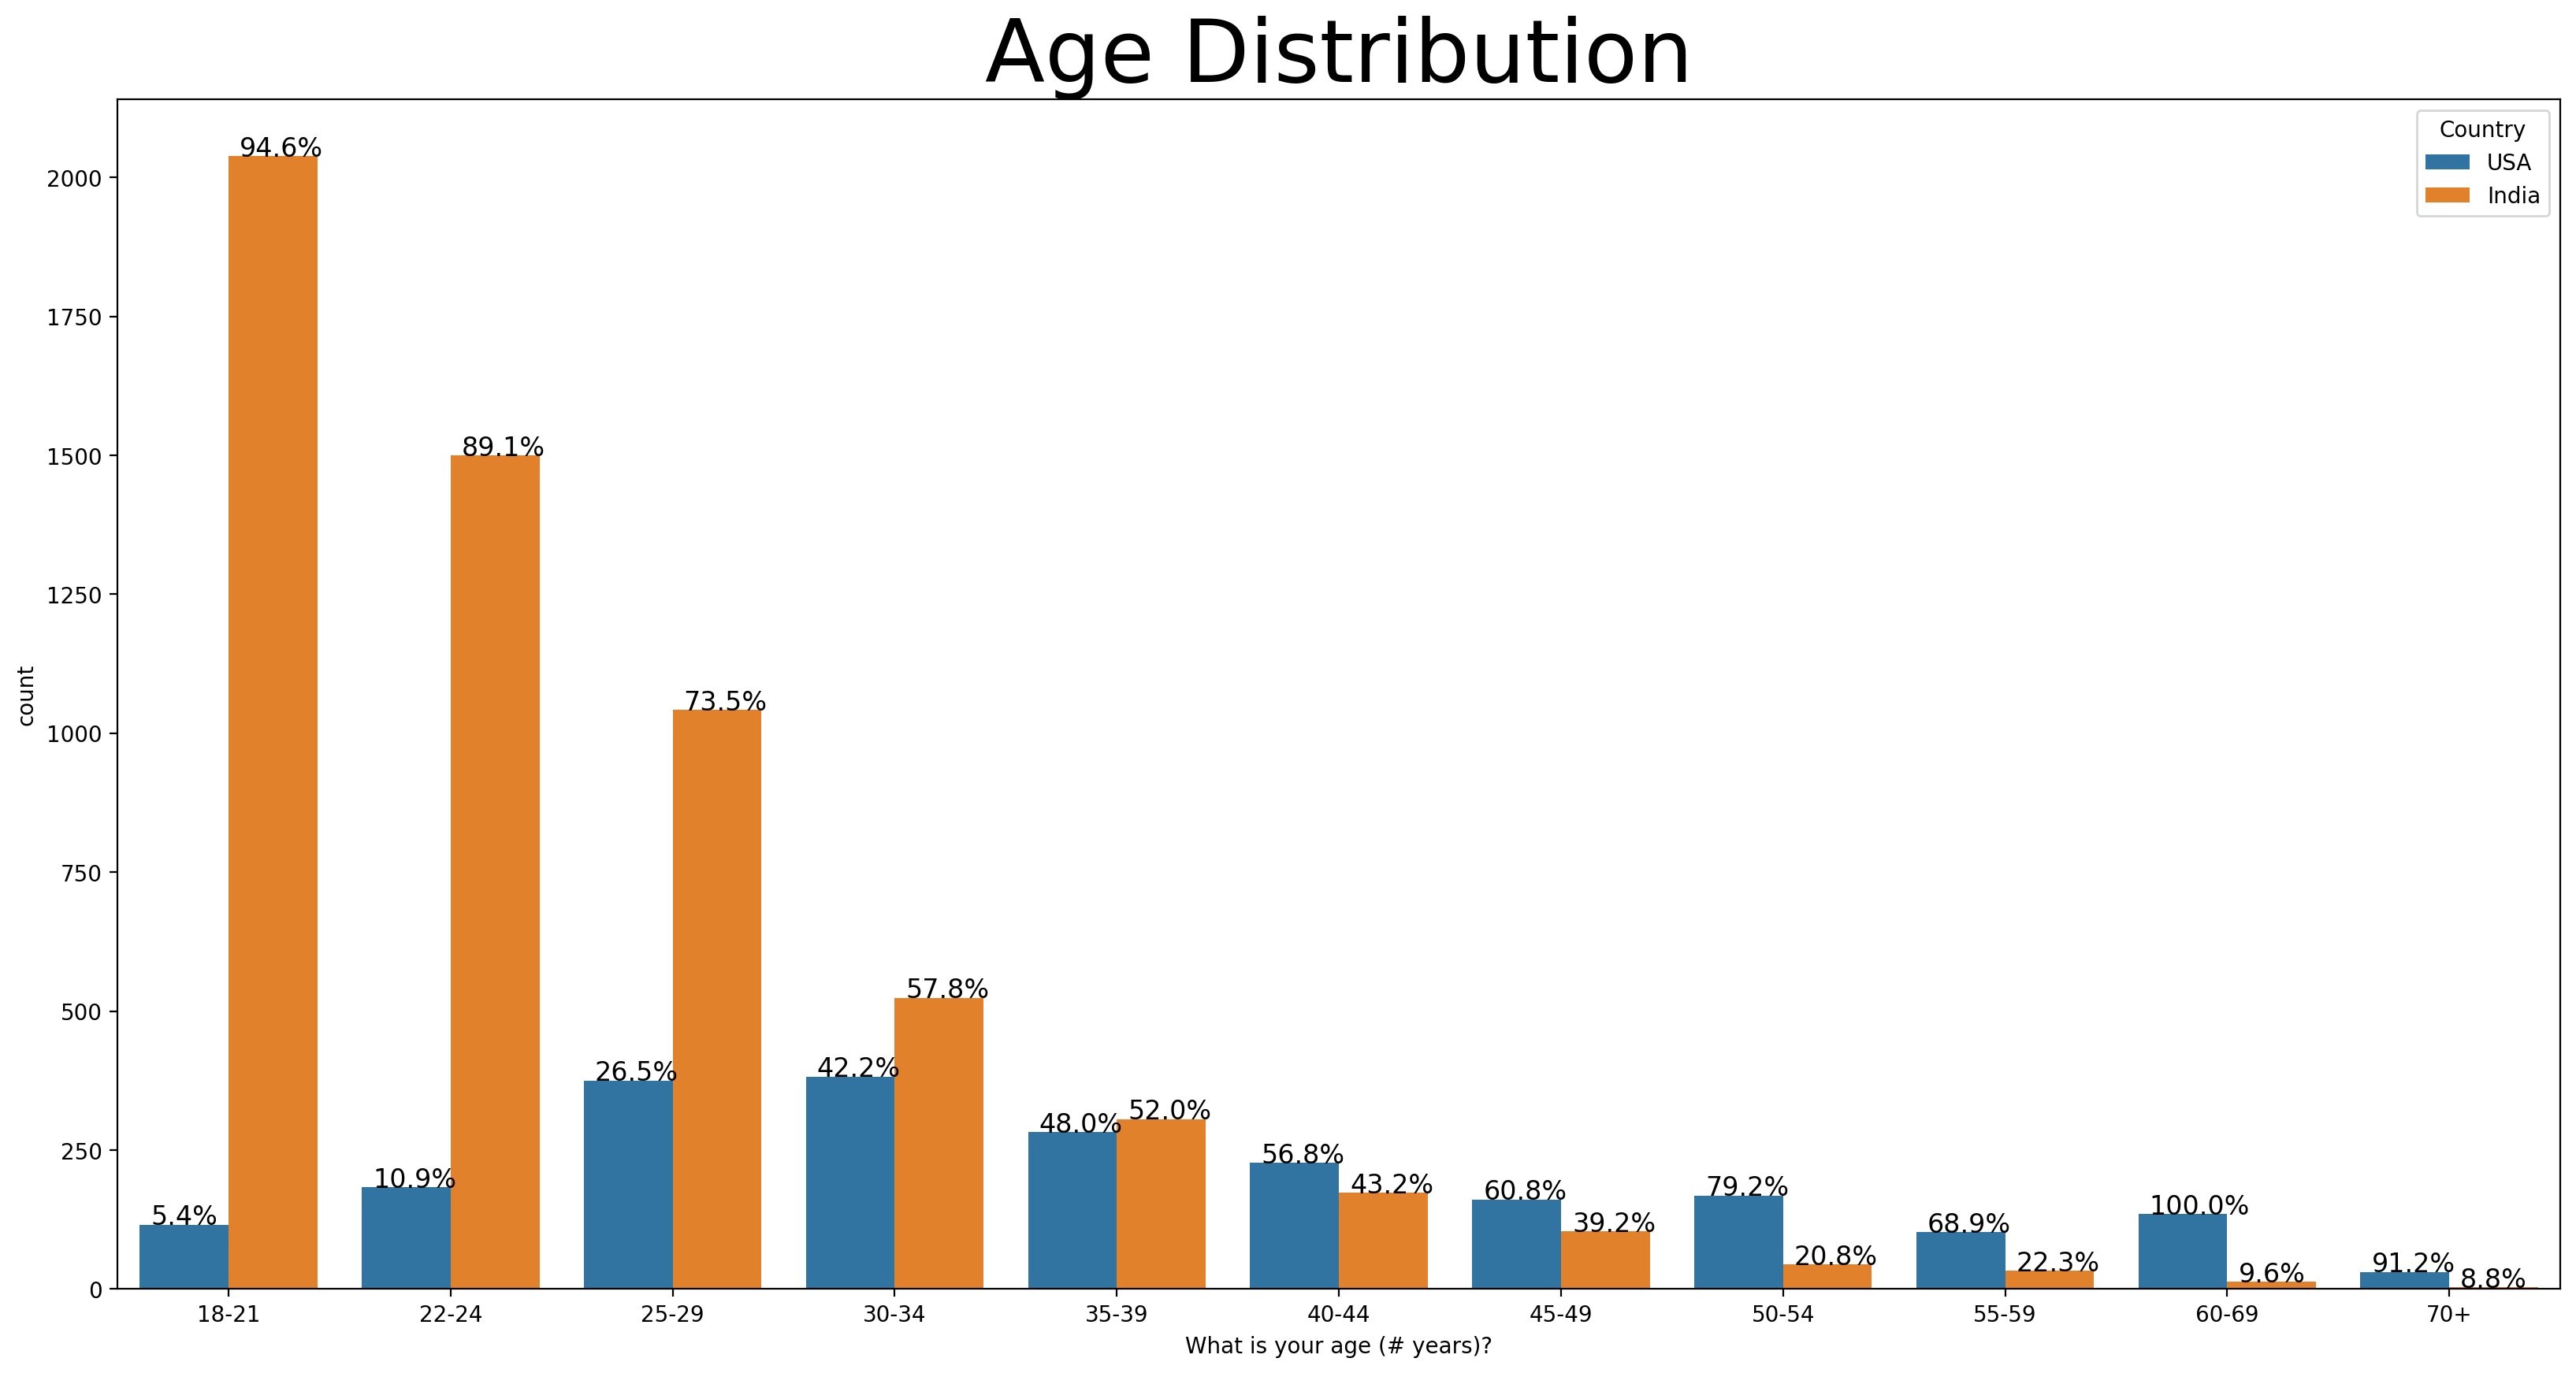

In [11]:
rcParams['figure.figsize'] = 20, 10

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Age Distribution', fontsize=40)
ax = sns.countplot(x = df.columns[1], 
                   hue = df.columns[3], 
                   order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59', '60-69', '70+'],
                   data = df)
with_hue(ax, df[df.columns[1]], 11, 2)

You can notice easily in the USA, distribution of age group is more regular than India. It represents the cording fever especially among young Indian.

In [12]:
q3_order = df[(df[df.columns[3]])].value_counts()[:11].index
df_q2q3 = df[(df[df.columns[2]],df[df.columns[3]])].groupby(df[df.columns[3]],df[df.columns[2]]).value_counts().unstack().loc[q3_order]
df_q2q3['sum'] = df_q2q3.sum(axis=1)
df_q2q3_ratio = (df_q2q3.T / df_q2q3['sum']).T[['Man','Woman']][::-1]

fig, ax = plt.subplots(1,1,figsize=(10, 2))

ax.barh(df_q2q3_ratio.index, df_q2q3_ratio['Man'], alpha=0.5, label='Man')
ax.barh(df_q2q3_ratio.index, df_q2q3_ratio['Woman'],
        left=df_q2q3_ratio['Man'], alpha=0.5, label='Woman')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(df_q2q3_ratio.index, fontsize=15)

# male percentage
for i in df_q2q3_ratio.index:
    ax.annotate(f"{df_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(df_q2q3_ratio['Man'][i]/2, i), fontsize=12, va='center')

for i in df_q2q3_ratio.index:
    ax.annotate(f"{df_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(df_q2q3_ratio['Man'][i]+df_q2q3_ratio['Woman'][i]/2, i),
                   va='center', ha='center', fontsize=12)
    
plt.title('Gender Distribution', fontsize=20)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.show()

KeyError: "None of [Index(['USA', 'India', 'India', 'USA', 'India', 'India', 'India', 'India',\n       'USA', 'USA',\n       ...\n       'USA', 'India', 'India', 'India', 'USA', 'India', 'USA', 'India',\n       'India', 'India'],\n      dtype='object', length=7942)] are in the [columns]"

The gender raions of two countires are alike.

## 3. Level of Education

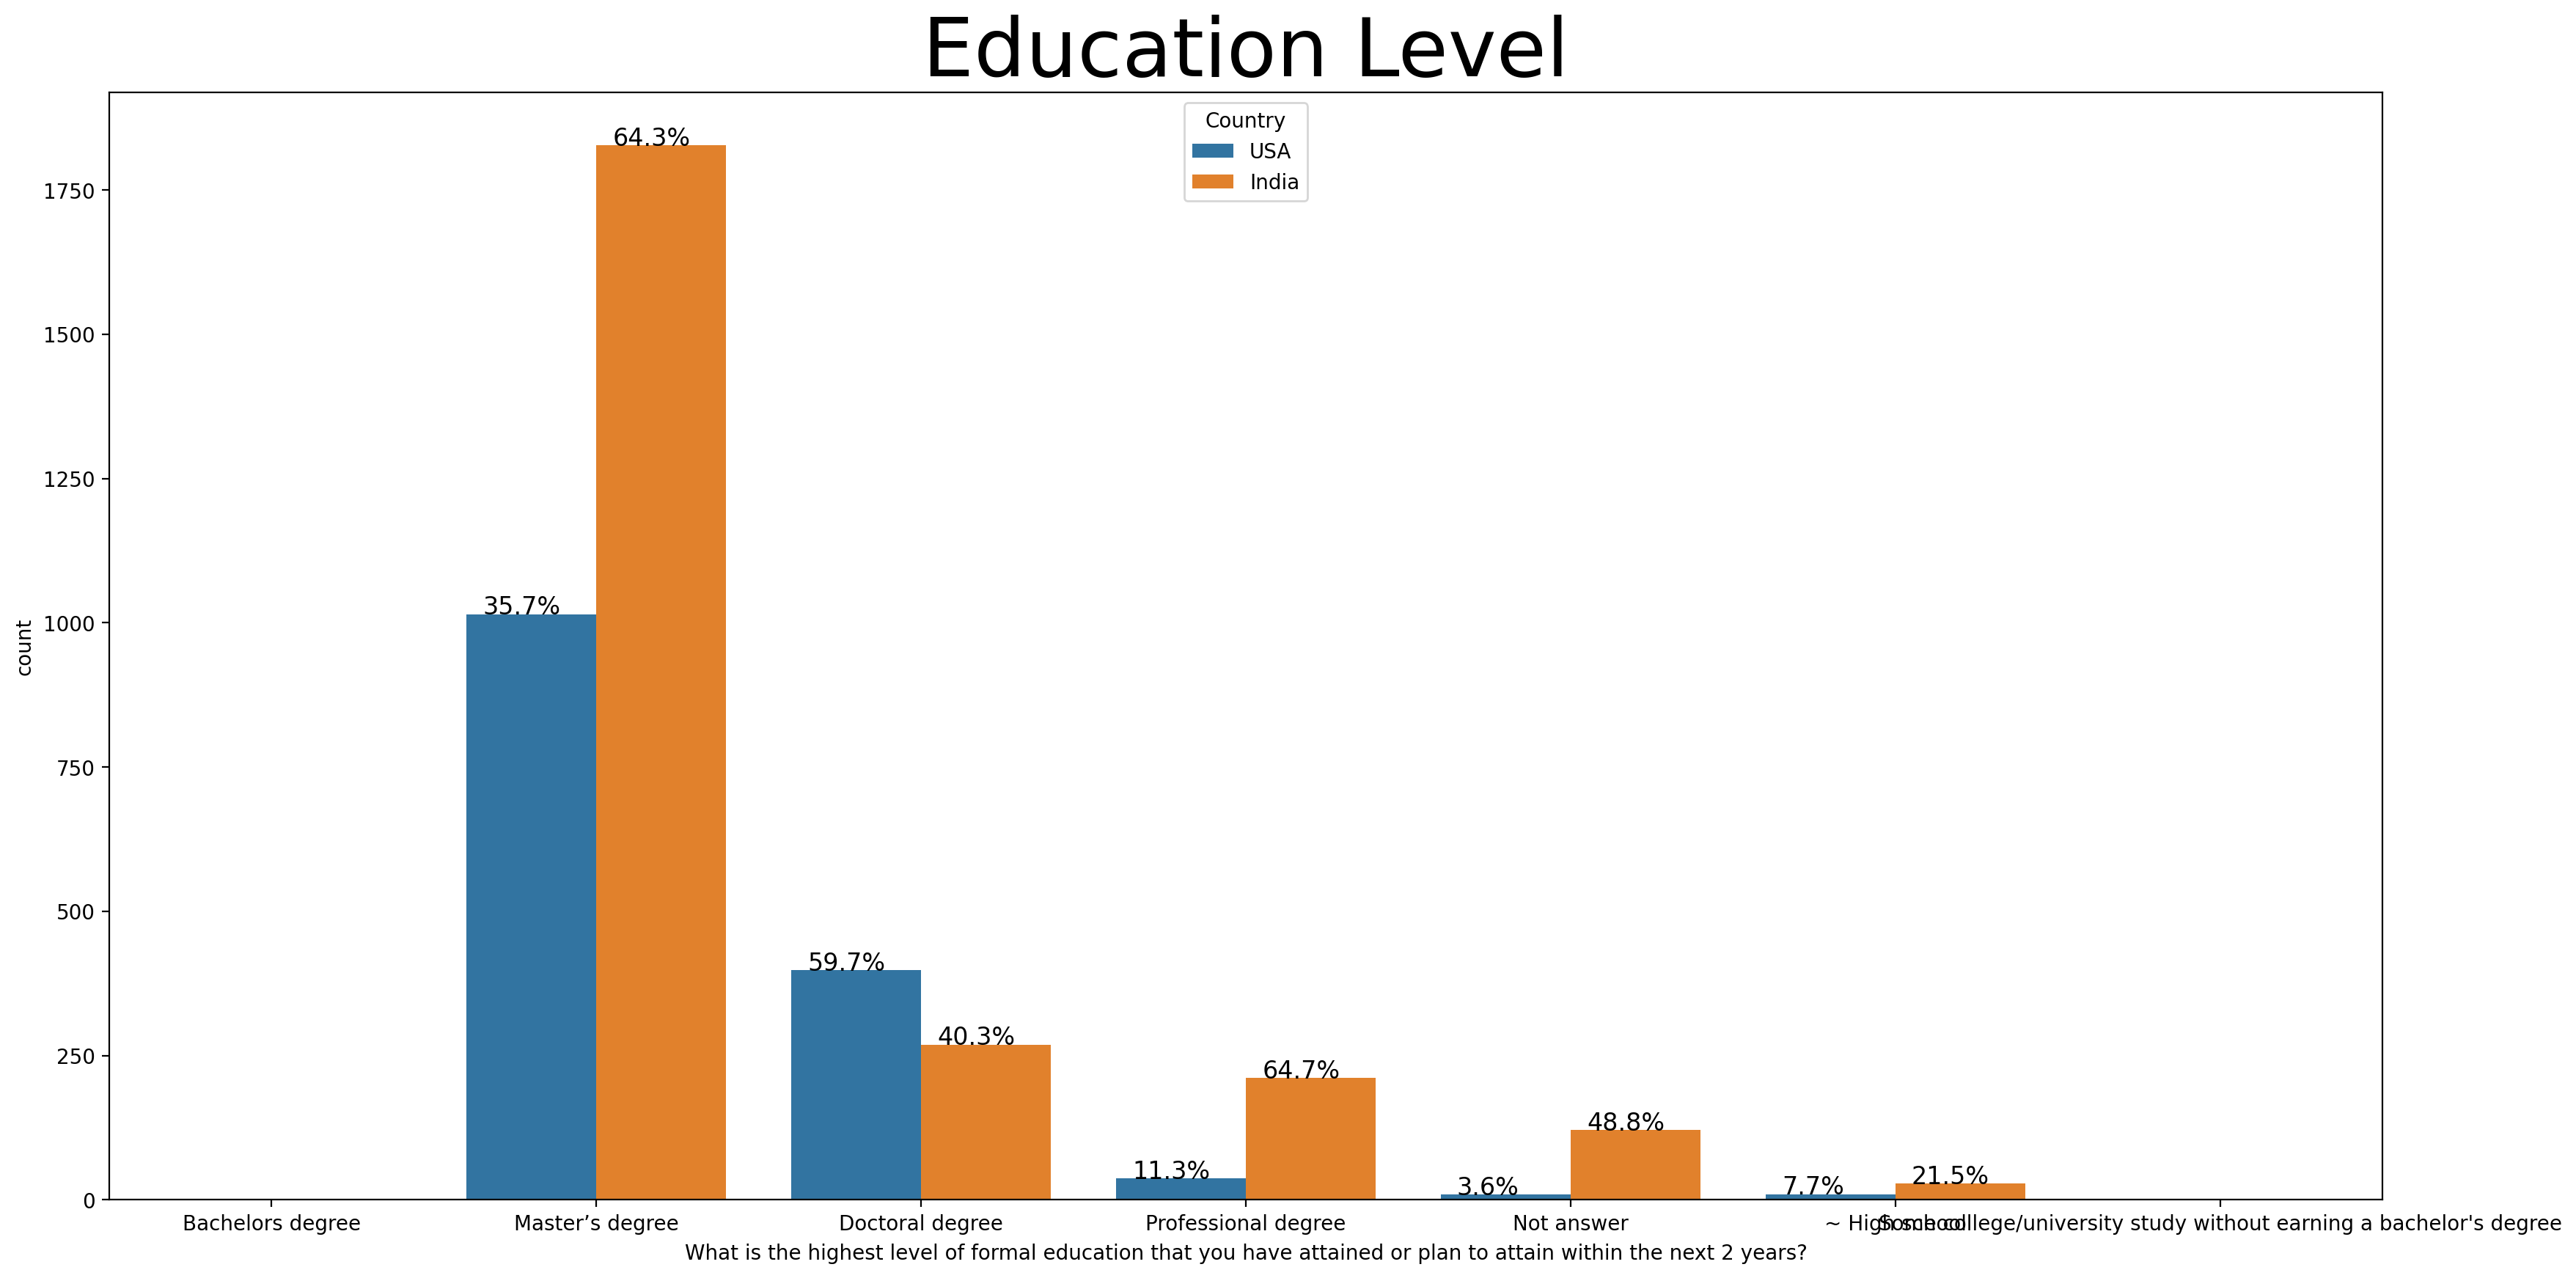

In [13]:
df[df.columns[4]].replace({'No formal education past high school':'~ High school',
                             'I prefer not to answer':'Not answer',
                             "Some college/university study without earning a bachelor's degree":"Study without a bachelor's degree",}, inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Education Level', fontsize=40)
ax = sns.countplot(x = df.columns[4], 
                   hue = df.columns[3],
                   order = ["Bachelors degree","Master’s degree",'Doctoral degree','Professional degree','Not answer','~ High school',"Some college/university study without earning a bachelor's degree"],
                   data = df)
with_hue(ax, df[df.columns[4]], 7, 2)

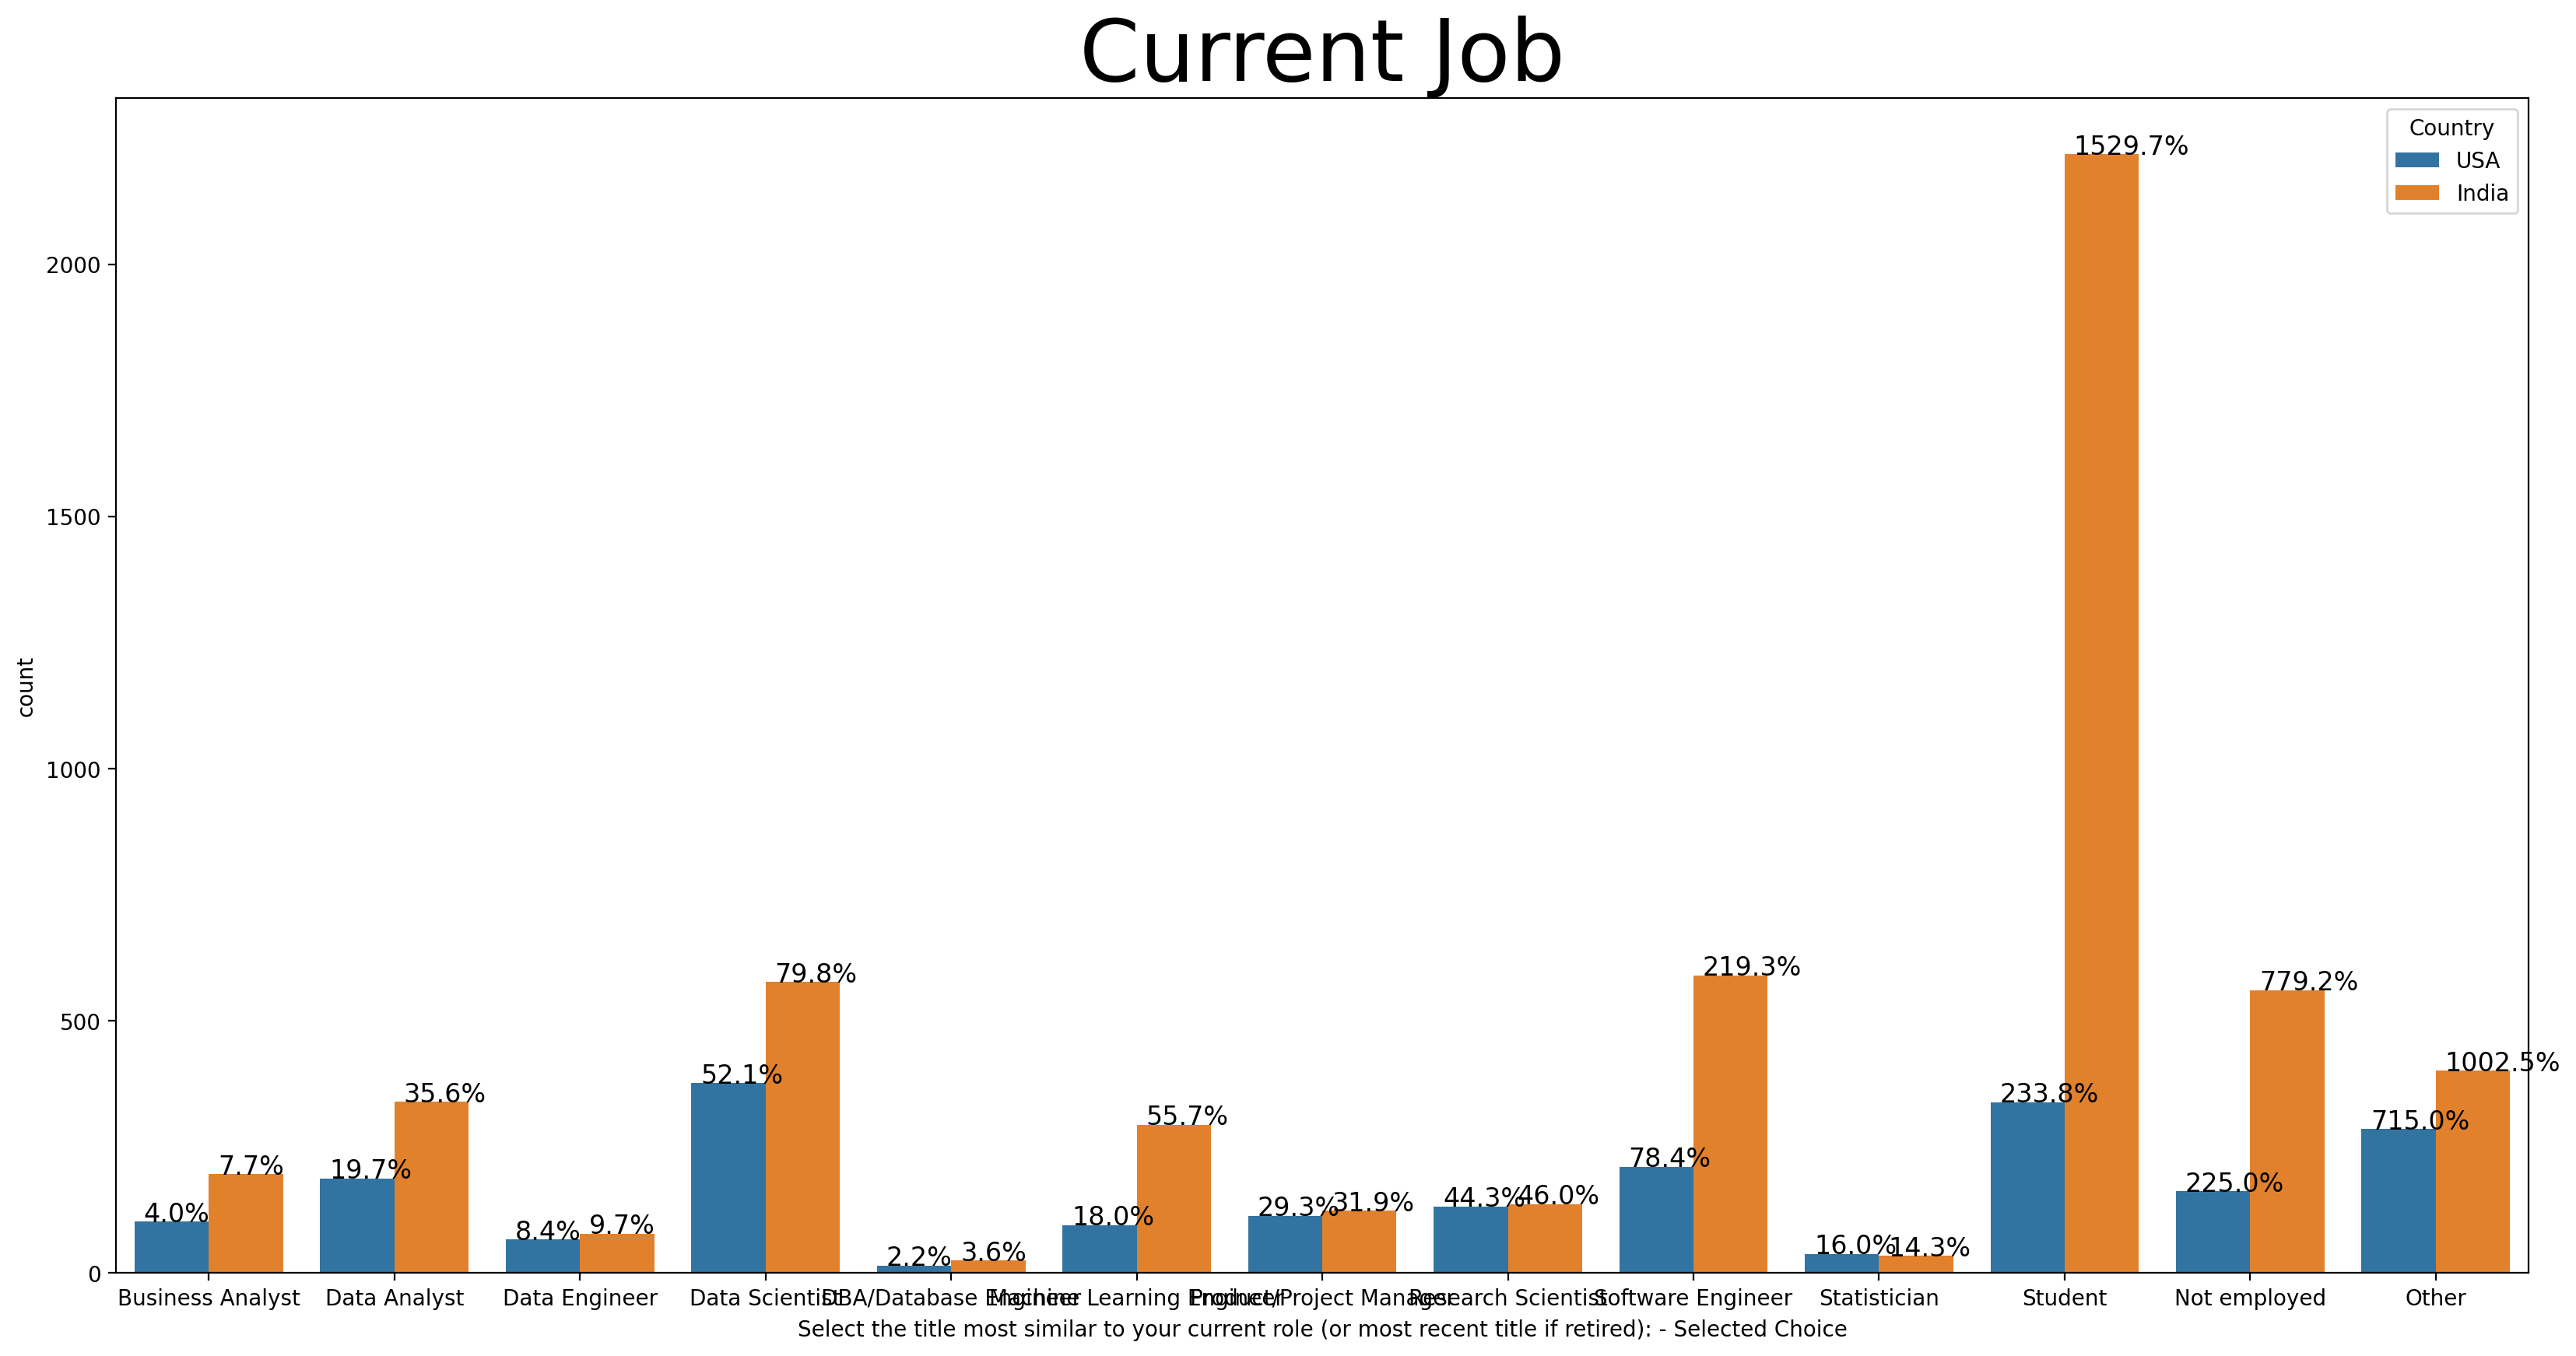

In [26]:
df[df.columns[5]].replace({'Currently not employed':'Not employed'},inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Current Job', fontsize=40)
ax = sns.countplot(x = df.columns[5], 
                   hue = df.columns[3],
                   order = ['Business Analyst','Data Analyst','Data Engineer','Data Scientist',
                            'DBA/Database Engineer','Machine Learning Engineer','Product/Project Manager',
                            'Research Scientist','Software Engineer','Statistician','Student','Not employed','Other'],
                   data = df)
with_hue(ax, df[df.columns[5]], 13, 2)

## 4. Development Environment

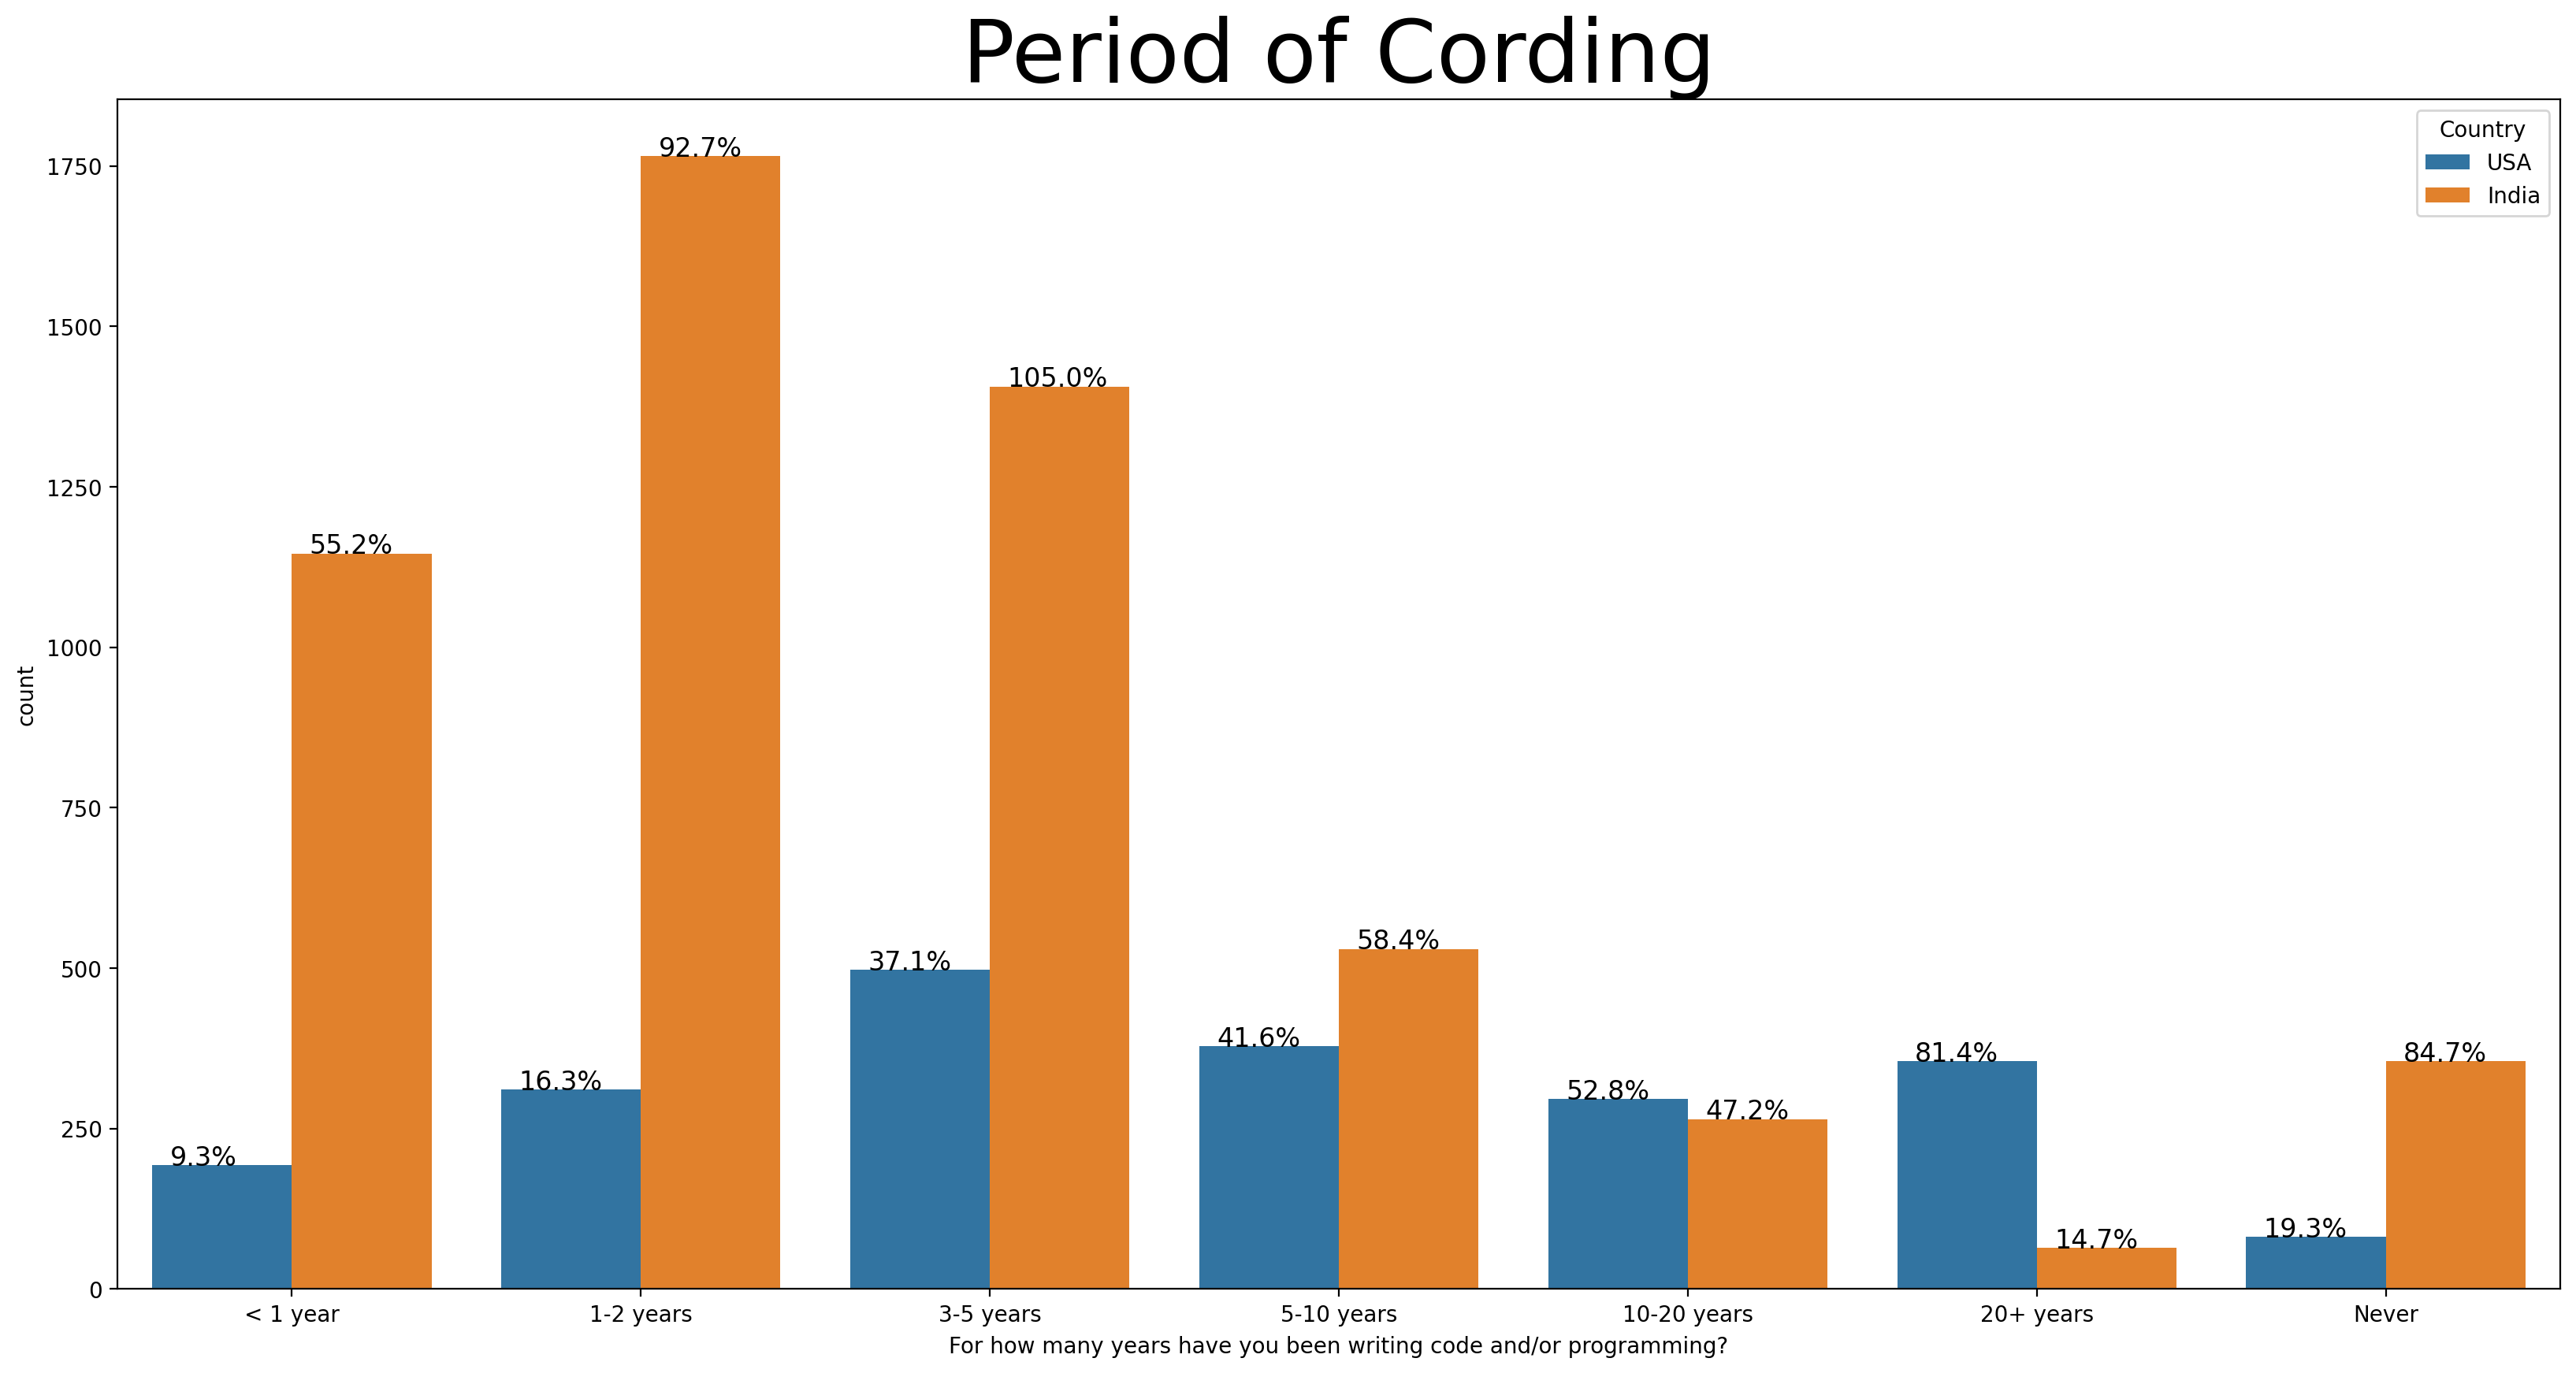

In [27]:
df[df.columns[6]].replace({'I have never written code':'Never',
                           '< 1 years':'< 1 year'}, inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Period of Cording', fontsize=40)
ax = sns.countplot(x = df.columns[6], 
                   hue = df.columns[3],
                   order = ['< 1 year','1-2 years','3-5 years','5-10 years','10-20 years','20+ years','Never'],
                   data = df)
with_hue(ax, df[df.columns[6]], 7, 2)

## 5. Basic of Machine Learning

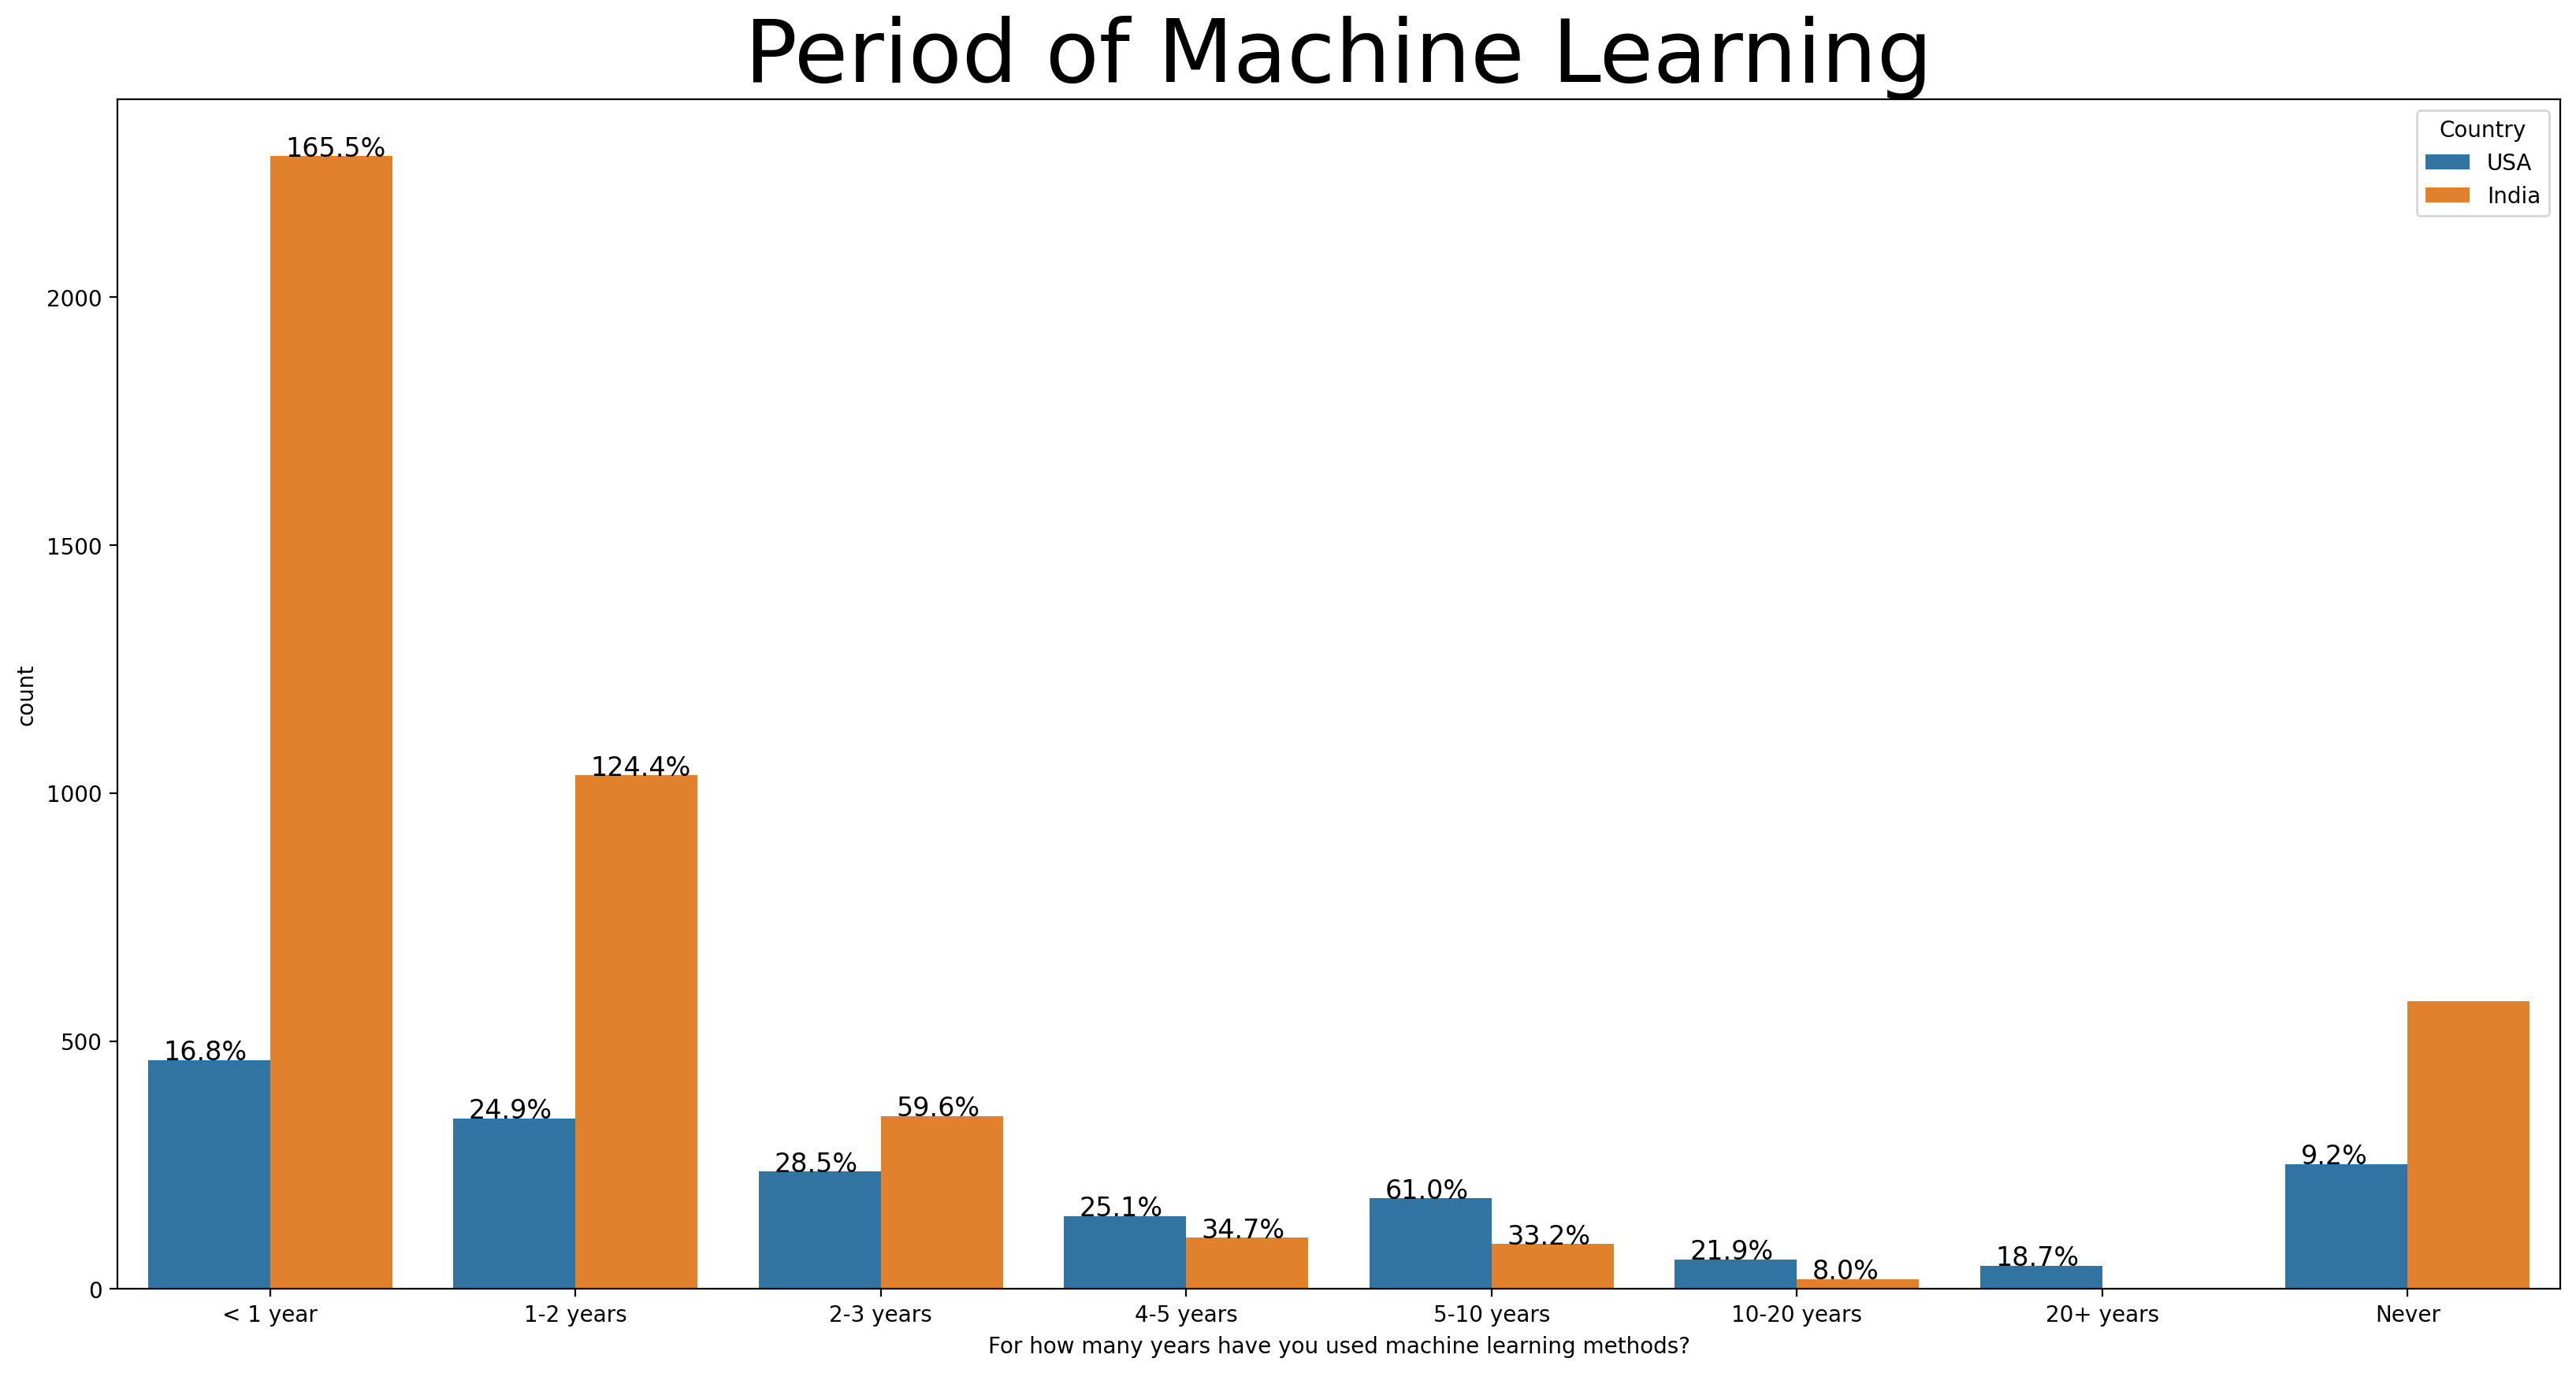

In [16]:
df[df.columns[65]].replace({'Under 1 year':'< 1 year',
                            '20 or more years':'20+ years',
                            'I do not use machine learning methods':'Never'}, inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Period of Machine Learning', fontsize=40)
ax = sns.countplot(x = df.columns[65], 
                   hue = df.columns[3],
                   order = ['< 1 year','1-2 years','2-3 years','4-5 years','5-10 years','10-20 years','20+ years','Never'],
                   data = df)
with_hue(ax, df[df.columns[65]], 7, 2)

## 6. CV vs NLP

In [17]:
# Preprocessing CV
df18 = (df[df.columns[94]], df[df.columns[95]], df[df.columns[96]],
        df[df.columns[97]], df[df.columns[98]], df[df.columns[99]], df[df.columns[100]])
df18 = pd.concat(df18)

# Preprocessing NLP
df19 = (df[df.columns[101]], df[df.columns[102]], df[df.columns[103]],
        df[df.columns[104]], df[df.columns[105]], df[df.columns[106]])
df19 = pd.concat(df19)

ValueError: Could not interpret input 'Q3'

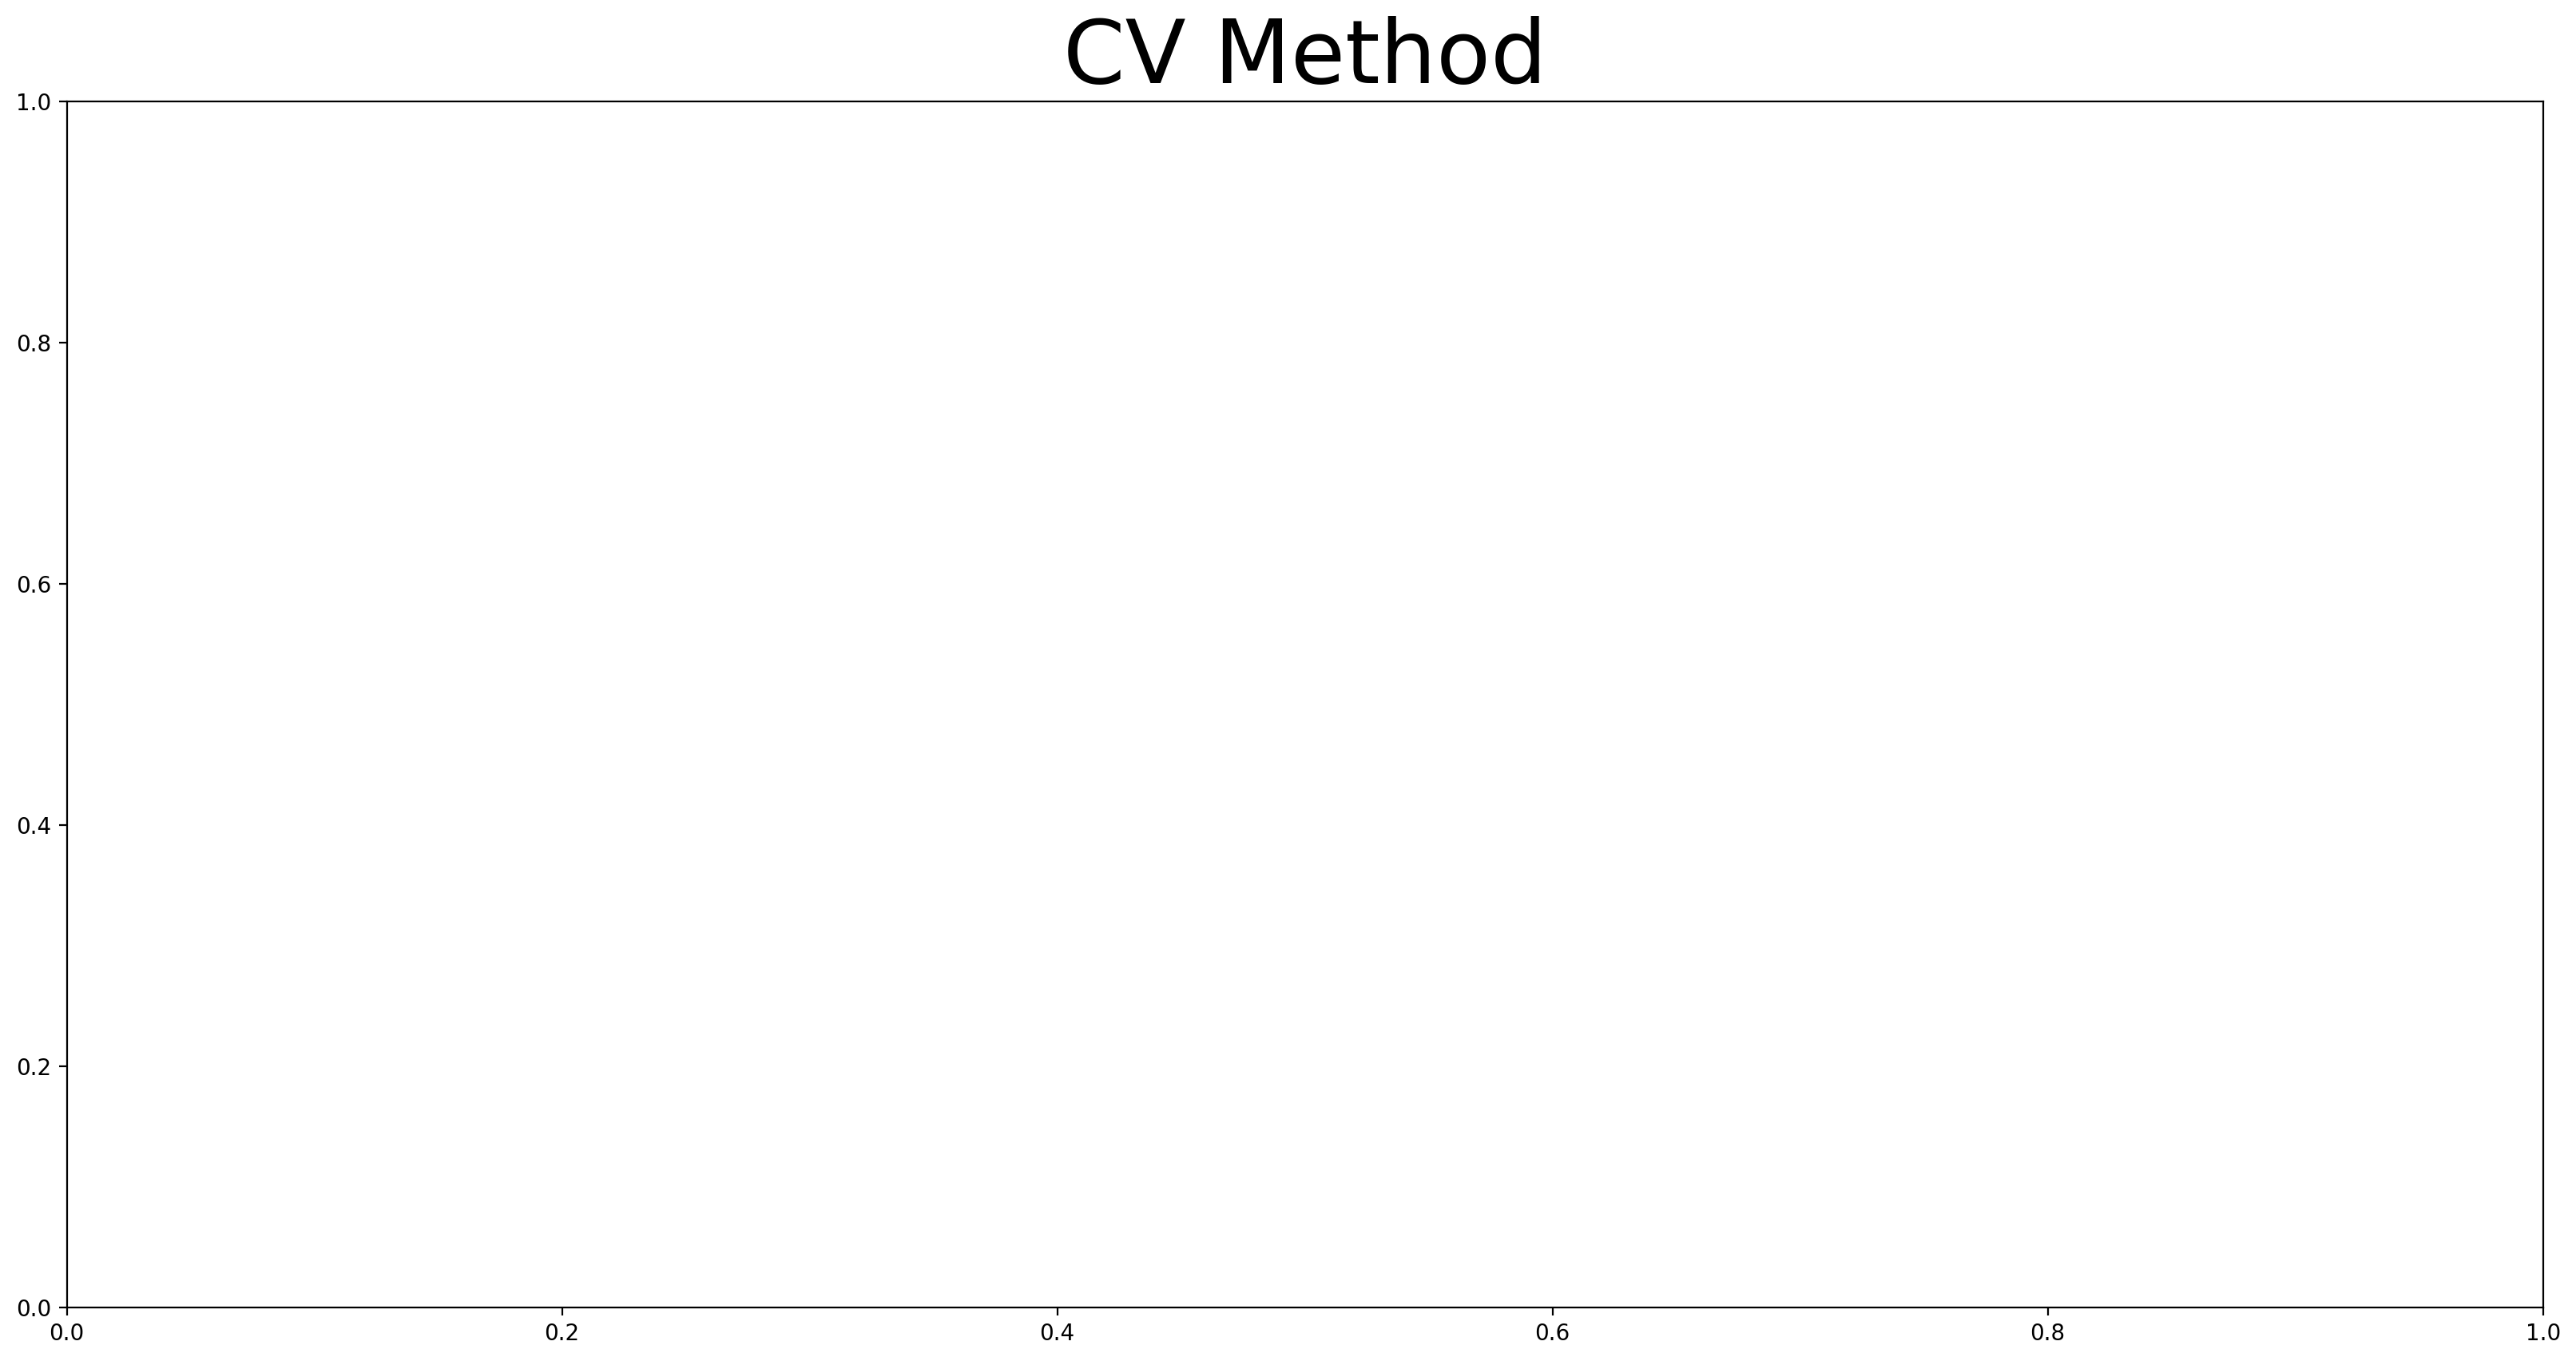

In [18]:
df18.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
               'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
               'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
               'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
               'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('CV Method', fontsize=40)
ax = sns.countplot(x = df18, 
                   hue = 'Q3',
                   data = df18)
with_hue(ax, df18, 7, 2)

In [20]:
df19.replace({'Word embeddings/vectors (GLoVe, fastText, word2vec)':'Word embeddings/vectors',
               'Encoder-decorder models (seq2seq, vanilla transformers)':'Encoder-decoder models',
               'Contextualized embeddings (ELMo, CoVe)':'Contextualized embeddings',
               'Transformer language models (GPT-3, BERT, XLnet, etc)':'Transformer language models'}, inplace=True)

## 7. Machine Learning in the business

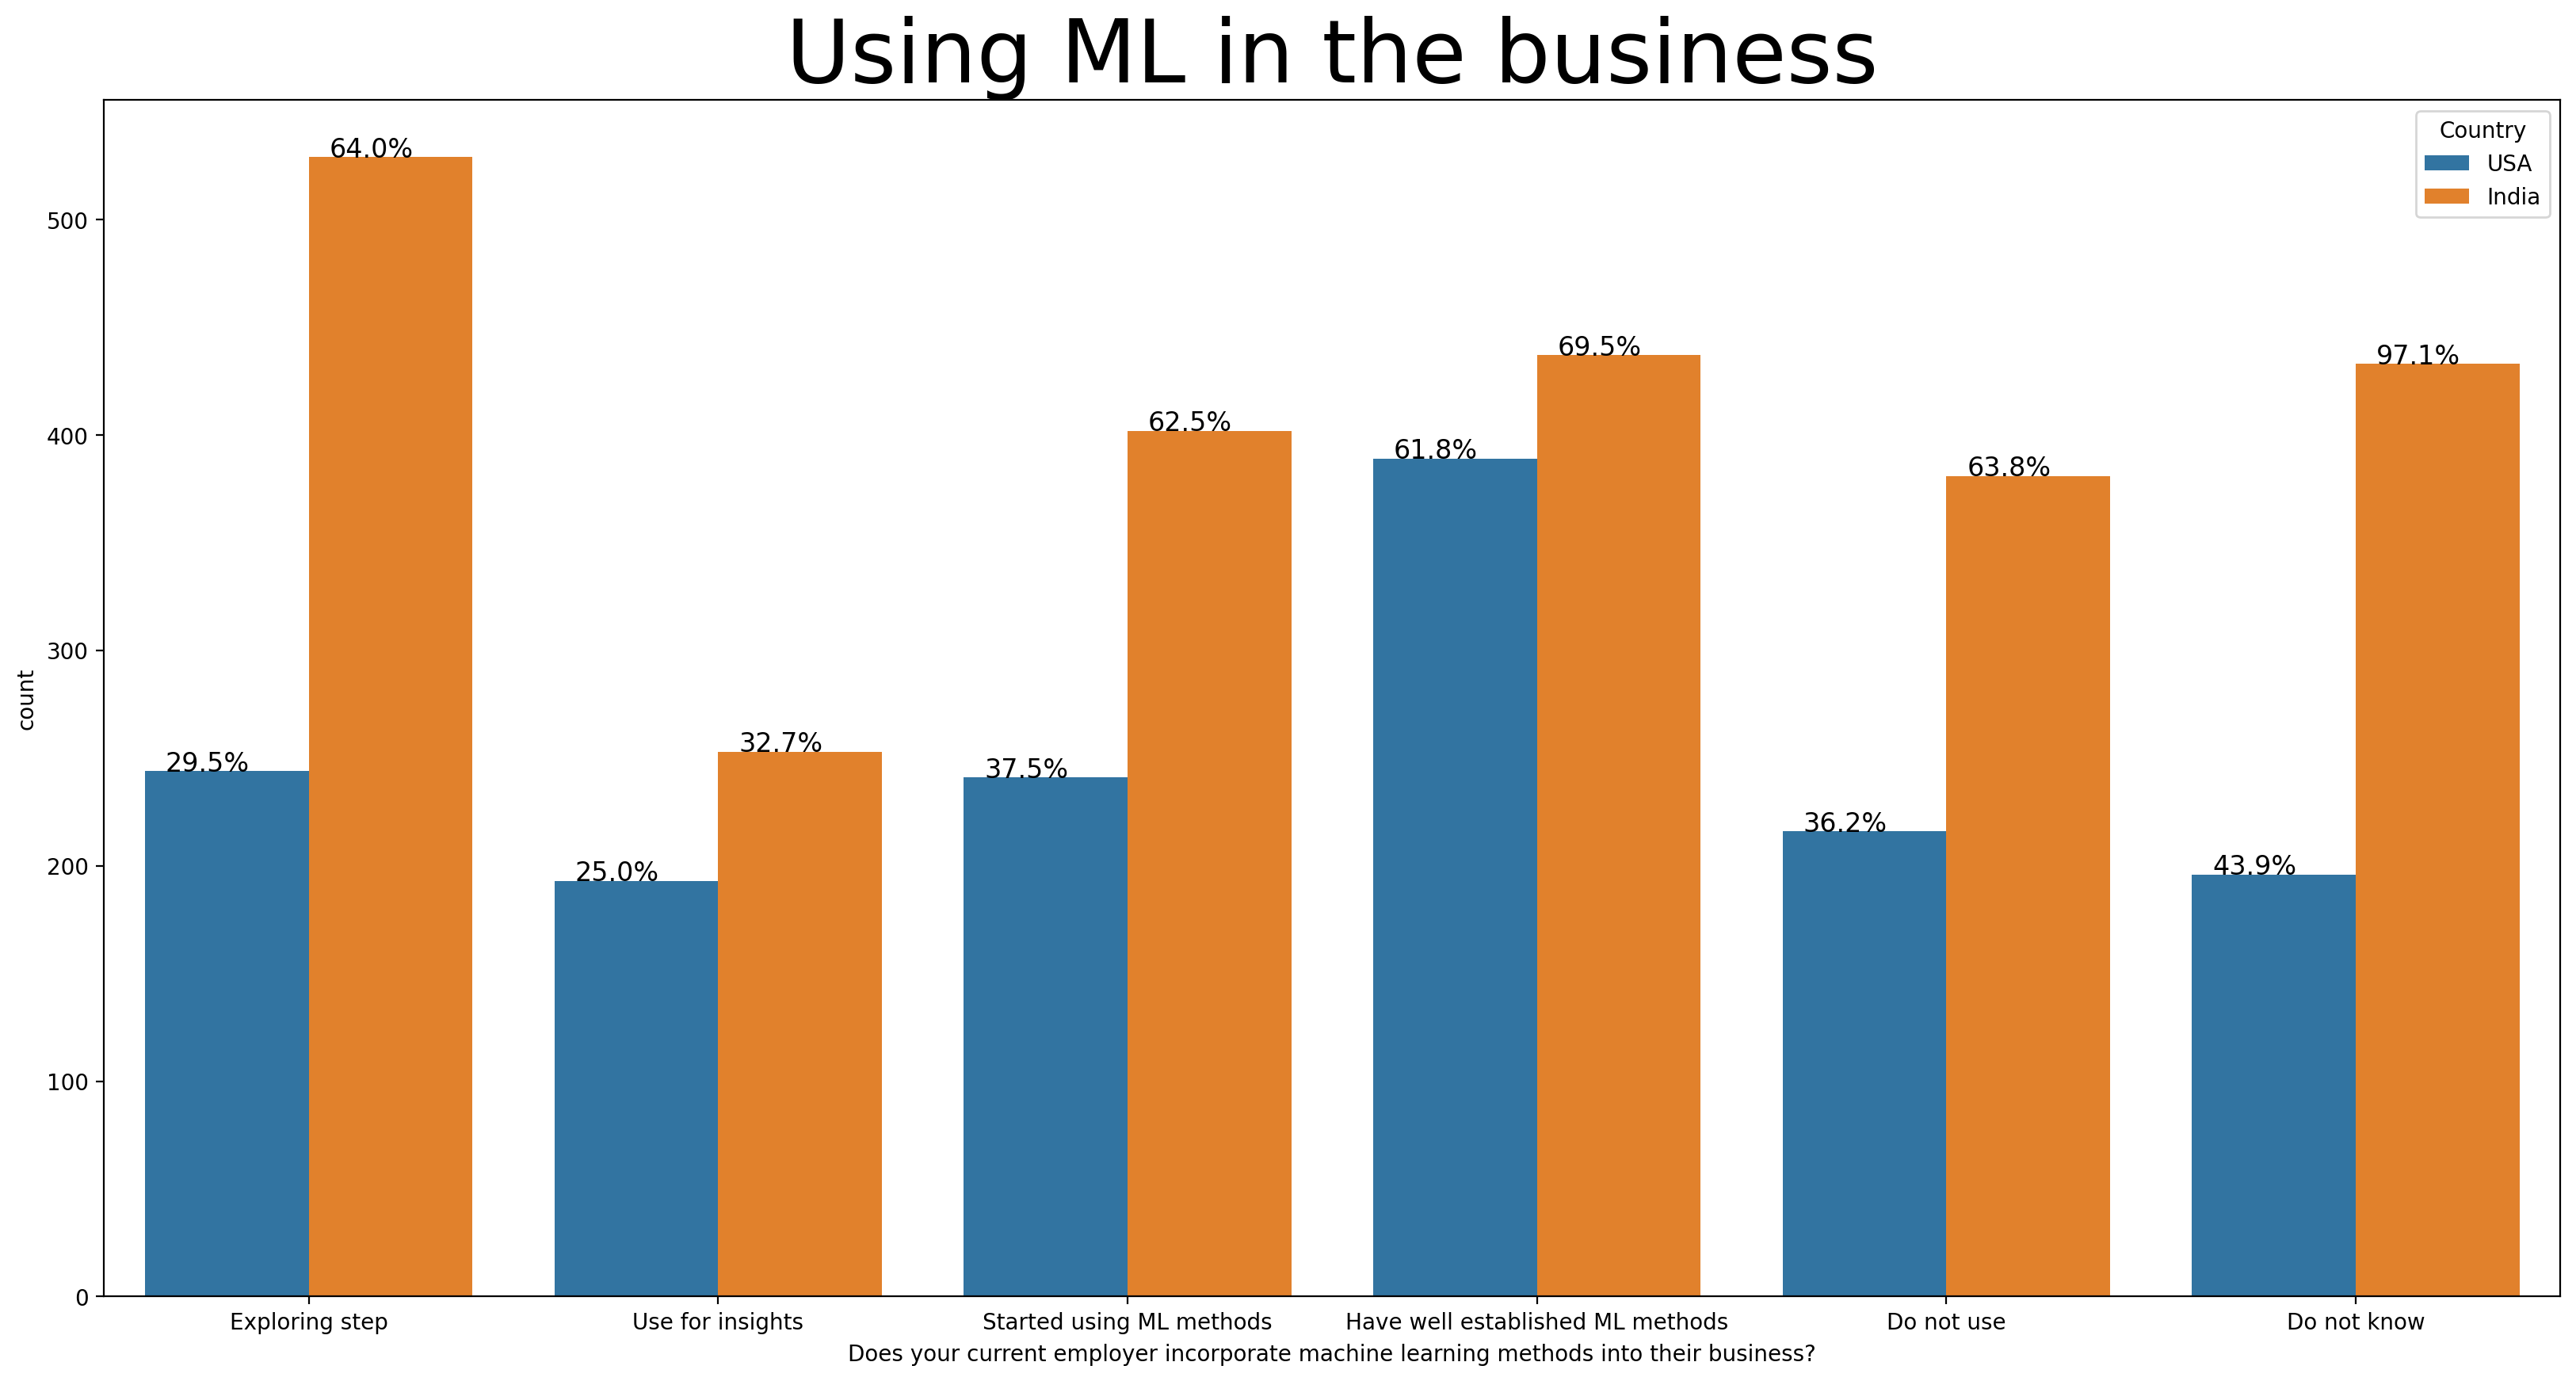

In [29]:
df[df.columns[109]].replace({'We are exploring ML methods (and may one day put a model into production)':'Exploring step',
                             'We use ML methods for generating insights (but do not put working models into production)':'Use for insights',
                             'We recently started using ML methods (i.e., models in production for less than 2 years)':'Started using ML methods',
                             'We have well established ML methods (i.e., models in production for more than 2 years)':'Have well established ML methods',
                             'No (we do not use ML methods)':'Do not use',
                             'I do not know':'Do not know'}, inplace=True)

rcParams['figure.figsize'] = 20, 10
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
total = float(len(df))

plt.title('Using ML in the business', fontsize=40)
ax = sns.countplot(x = df.columns[109], 
                   hue = df.columns[3],
                   order = ['Exploring step','Use for insights','Started using ML methods','Have well established ML methods','Do not use','Do not know'],
                   data = df)
with_hue(ax, df[df.columns[109]], 6, 2)